## Feature Vector Construction

### ACW Feature Vector Construction

In [10]:
# Import necessary libraries
import pandas as pd
import numpy as np

def load_data(filepath):
    df = pd.read_csv(filepath)
    return df

def create_acw_feature_vectors(df):
    """
    Reshape data into feature vectors with one row per subject.
    
    Parameters
    ----------
    df : pandas.DataFrame
        Input DataFrame containing columns:
        - Subject: Subject ID
        - Group: Subject group (e.g. HC, MDD) 
        - Region: Brain region name
        - ACW_Type: Type of ACW measurement
        - ACW_Value: ACW measurement value

    Returns
    -------
    pandas.DataFrame
        Reshaped DataFrame with columns for each region-ACW_Type combination
        (e.g. 'dmn_ACW_Nadir', 'dmn_ACW_0', etc.)
    """
    # Create combined identifier for Region and ACW_Type
    df['region_acw'] = df['Region'] + '_' + df['ACW_Type']
    
    # Pivot table to reshape data
    feature_vectors = df.pivot_table(
        index=['Subject', 'Group'],
        columns='region_acw', 
        values='ACW_Value'
    ).reset_index()
    
    # Define column order based on regions and ACW types
    regions = ['auditory', 'visual', 'motor', 'dmn', 'fpn', 'salience', 'limbic']
    acw_types = df['ACW_Type'].unique()
    column_order = ['Subject'] + [
        f'{region}_{acw}' for region in regions 
        for acw in acw_types
    ] + ['Group']
    
    # Reorder columns (only include columns that exist in feature_vectors)
    existing_columns = ['Subject'] + [
        col for col in column_order[1:-1] 
        if col in feature_vectors.columns
    ] + ['Group']
    feature_vectors = feature_vectors[existing_columns]
    
    return feature_vectors

### Setup directory

In [11]:
# Load and process data
from pathlib import Path

# Find the project root directory
notebook_path = Path.cwd()
project_root = notebook_path.parents[0] 
print(project_root)

/Users/fdjim/Desktop/PDS_CODE


### Construct Feature Vectors - **Main Execution** 

In [16]:
# Main execution

filepath = project_root / "results" / "combined_acw_results_no_outliers.csv"
acw_types = ['ACW_Nadir', 'ACW_0']

# Ensure the file exists
if not filepath.exists():
    raise FileNotFoundError(f"The file {filepath} does not exist. Please check the file path.")


filtered_data = load_data(filepath)
feature_vectors = create_acw_feature_vectors(filtered_data)

# Reset the index to remove the numbered index column
feature_vectors = feature_vectors.reset_index(drop=True)

# Display first few rows
print("Shape of feature vectors:", feature_vectors.shape)
feature_vectors.head()

Shape of feature vectors: (57, 23)


region_acw,Subject,auditory_ACW_50,auditory_ACW_0,auditory_ACW_Nadir,visual_ACW_50,visual_ACW_0,visual_ACW_Nadir,motor_ACW_50,motor_ACW_0,motor_ACW_Nadir,...,fpn_ACW_50,fpn_ACW_0,fpn_ACW_Nadir,salience_ACW_50,salience_ACW_0,salience_ACW_Nadir,limbic_ACW_50,limbic_ACW_0,limbic_ACW_Nadir,Group
0,sub-003P,2.0,4.5,6.0,3.2,7.4,9.6,3.0,7.0,10.0,...,2.5,6.0,7.5,2.0,4.0,5.0,2.0,4.5,6.0,MDD
1,sub-005P,2.0,7.5,4.0,2.0,7.0,10.0,2.0,7.5,10.5,...,2.0,4.5,7.0,2.0,6.0,4.0,2.0,7.0,3.5,MDD
2,sub-006C,2.0,7.0,7.0,2.0,8.8,11.6,2.0,11.5,8.5,...,2.0,7.0,7.0,2.0,11.0,5.5,2.0,4.0,4.0,HC
3,sub-007C,2.5,7.0,7.0,2.0,8.6,10.0,2.0,6.5,6.0,...,2.0,6.0,6.5,2.0,6.0,7.0,2.0,5.5,7.0,HC
4,sub-007P,2.0,7.0,5.5,3.2,9.4,14.8,2.0,8.0,9.5,...,2.0,5.0,7.5,2.0,7.0,5.5,2.0,5.0,5.0,MDD


In [18]:
# Drop ACW 50 from feature vector, since those values are not well distributed
feature_vectors_filtered = feature_vectors.drop(columns=['limbic_ACW_50', 'dmn_ACW_50', 'fpn_ACW_50', 'salience_ACW_50', 'auditory_ACW_50', 'visual_ACW_50', 'motor_ACW_50'])

# Display first few rows
print("Shape of feature vectors:", feature_vectors_filtered.shape)
feature_vectors_filtered.head()

Shape of feature vectors: (57, 16)


region_acw,Subject,auditory_ACW_0,auditory_ACW_Nadir,visual_ACW_0,visual_ACW_Nadir,motor_ACW_0,motor_ACW_Nadir,dmn_ACW_0,dmn_ACW_Nadir,fpn_ACW_0,fpn_ACW_Nadir,salience_ACW_0,salience_ACW_Nadir,limbic_ACW_0,limbic_ACW_Nadir,Group
0,sub-003P,4.5,6.0,7.4,9.6,7.0,10.0,5.333333,7.333333,6.0,7.5,4.0,5.0,4.5,6.0,MDD
1,sub-005P,7.5,4.0,7.0,10.0,7.5,10.5,8.000000,8.333333,4.5,7.0,6.0,4.0,7.0,3.5,MDD
2,sub-006C,7.0,7.0,8.8,11.6,11.5,8.5,4.333333,5.666667,7.0,7.0,11.0,5.5,4.0,4.0,HC
3,sub-007C,7.0,7.0,8.6,10.0,6.5,6.0,6.000000,8.000000,6.0,6.5,6.0,7.0,5.5,7.0,HC
4,sub-007P,7.0,5.5,9.4,14.8,8.0,9.5,7.333333,9.333333,5.0,7.5,7.0,5.5,5.0,5.0,MDD


### Add power spectrum features to feature vector

- I have the power spectrum features for each subject in a separate file. I need to add them to the feature vector.
- I have files for the power spectrum features for the HC, MDD and SZ groups.
- I have filtered the power spectrum files to only include the frequency bands of interest at 0.125 Hz (8s period) and 0.03125 Hz (32s period)

### Execution
- Load each file into a dataframe
- Compute, for each subject, the mean power in the 0.125 Hz band and the 0.03125 Hz band in each region
- Add the mean power values to the feature vector as a new column named "region_0.125_mean" and "region_0.03125_mean"
- Concatenate the new columns to the feature vector


In [30]:
def process_single_psd_file(psd_df):
    """
    Process a single PSD file to create features for one frequency band.
    
    Parameters
    ----------
    psd_df : pandas.DataFrame
        Input DataFrame containing power spectrum data
    
    Returns
    -------
    pandas.DataFrame
        Features with one row per subject and mean power for each region
    """
    # First calculate mean across frequency bands for each subject-region combination
    freq_cols = [col for col in psd_df.columns if 'freq' in col]
    mean_power = psd_df[freq_cols].mean(axis=1)
    
    # Create a new dataframe with just subject, roi, and mean power
    features = pd.DataFrame({
        'subject': psd_df['subject'],
        'roi': psd_df['roi'],
        'mean_power': mean_power
    })
    
    # Now pivot to get regions as columns
    features = features.pivot(
        index='subject',
        columns='roi',
        values='mean_power'
    )
    
    # Reset index to make subject a column
    features = features.reset_index()
    
    return features

def create_psd_features(hc_003hz_path, hc_012hz_path):
    """
    Create combined features from both frequency bands.
    
    Parameters
    ----------
    hc_003hz_path : str or Path
        Path to 0.03Hz band PSD file
    hc_012hz_path : str or Path
        Path to 0.12Hz band PSD file
    
    Returns
    -------
    pandas.DataFrame
        Combined features with columns for both frequency bands
    """
    # Load and process each file
    psd_003hz = pd.read_csv(hc_003hz_path)
    psd_012hz = pd.read_csv(hc_012hz_path)
    
    # Process each frequency band
    features_003hz = process_single_psd_file(psd_003hz)
    features_012hz = process_single_psd_file(psd_012hz)
    
    # Rename columns to indicate frequency band
    features_003hz = features_003hz.rename(
        columns={col: f"{col}_003hz" for col in features_003hz.columns if col != 'subject'}
    )
    features_012hz = features_012hz.rename(
        columns={col: f"{col}_012hz" for col in features_012hz.columns if col != 'subject'}
    )
    
    # Merge the features
    combined_features = features_003hz.merge(
        features_012hz,
        on='subject',
        how='outer'
    )
    
    return combined_features

roi   subject  auditory_003hz  dmn_003hz  fpn_003hz  limbic_003hz  \
0    sub-006C        6.389711   6.075274   8.865085      6.657309   
1    sub-007C        8.278570  20.821595  17.387788      4.836920   
2    sub-009C        7.699927   6.345741  26.527939      7.154495   
3    sub-013C        7.643719  12.013667  10.988889      7.416862   
4    sub-014C        8.454233   4.901028   8.405997     10.945953   

roi  motor_003hz  salience_003hz  visual_003hz  auditory_012hz  dmn_012hz  \
0      11.029894        8.896609      6.192024        5.482255   4.767781   
1       5.803226        5.213931      7.372459        4.243131   5.734552   
2       4.054243        8.541709      6.941576        5.504157   3.052202   
3       3.902107        5.380286      7.188586        3.611617   2.258156   
4       6.602067        5.403624      7.458100        4.334758   3.828591   

roi  fpn_012hz  limbic_012hz  motor_012hz  salience_012hz  visual_012hz  
0     5.292272      5.161580     4.388022       

In [32]:
hc_band_003hz_path = project_root / "periodogram" / "psd_band_hc_0.03_0.03hz.csv" 
hc_band_012hz_path = project_root / "periodogram" / "psd_band_hc_0.11_0.12hz.csv"

mdd_band_003hz_path = project_root / "periodogram" / "psd_band_mdd_0.03_0.03hz.csv"
mdd_band_012hz_path = project_root / "periodogram" / "psd_band_mdd_0.11_0.12hz.csv"

sz_band_003hz_path = project_root / "periodogram" / "psd_band_sz_0.03_0.03hz.csv"
sz_band_012hz_path = project_root / "periodogram" / "psd_band_sz_0.11_0.12hz.csv"

psd_features_hc = create_psd_features(
    hc_band_003hz_path,
    hc_band_012hz_path,
)

psd_features_mdd = create_psd_features(
    mdd_band_003hz_path,
    mdd_band_012hz_path,
)

psd_features_sz = create_psd_features(
    sz_band_003hz_path,
    sz_band_012hz_path,
)

# Display first few rows
print("Shape of PSD features:", psd_features_hc.shape)
psd_features_hc.head()

Shape of PSD features: (20, 15)


roi,subject,auditory_003hz,dmn_003hz,fpn_003hz,limbic_003hz,motor_003hz,salience_003hz,visual_003hz,auditory_012hz,dmn_012hz,fpn_012hz,limbic_012hz,motor_012hz,salience_012hz,visual_012hz
0,sub-006C,6.389711,6.075274,8.865085,6.657309,11.029894,8.896609,6.192024,5.482255,4.767781,5.292272,5.161580,4.388022,4.115638,4.785216
1,sub-007C,8.278570,20.821595,17.387788,4.836920,5.803226,5.213931,7.372459,4.243131,5.734552,5.375615,2.593120,9.187458,4.895916,4.263522
2,sub-009C,7.699927,6.345741,26.527939,7.154495,4.054243,8.541709,6.941576,5.504157,3.052202,3.947917,5.793094,5.341438,4.283921,6.053928
3,sub-013C,7.643719,12.013667,10.988889,7.416862,3.902107,5.380286,7.188586,3.611617,2.258156,2.073543,3.349486,2.939438,2.777118,1.987357
4,sub-014C,8.454233,4.901028,8.405997,10.945953,6.602067,5.403624,7.458100,4.334758,3.828591,3.200621,4.444391,4.198233,4.050902,3.779572


In [34]:
# Combine the vectors
# First create the combined PSD features
def combine_group_features(psd_features_hc, psd_features_mdd, psd_features_sz):
    """
    Combine PSD features from different groups into a single DataFrame.
    
    Parameters
    ----------
    psd_features_hc : pandas.DataFrame
        PSD features for HC group
    psd_features_mdd : pandas.DataFrame
        PSD features for MDD group
    psd_features_sz : pandas.DataFrame
        PSD features for SZ group
        
    Returns
    -------
    pandas.DataFrame
        Combined features with group information
    """
    # Add group column to each DataFrame
    psd_features_hc['Group'] = 'HC'
    psd_features_mdd['Group'] = 'MDD'
    psd_features_sz['Group'] = 'SZ'
    
    # Concatenate all features vertically
    combined_features = pd.concat(
        [psd_features_hc, psd_features_mdd, psd_features_sz],
        axis=0,
        ignore_index=True
    )
    
    # Reorder columns to put Subject and Group first
    cols = ['subject', 'Group'] + [col for col in combined_features.columns 
                                  if col not in ['subject', 'Group']]
    combined_features = combined_features[cols]
    
    return combined_features

# Use the function
combined_psd_features = combine_group_features(
    psd_features_hc,
    psd_features_mdd,
    psd_features_sz
)

# Display the shape and first few rows
print("Shape of combined PSD features:", combined_psd_features.shape)
combined_psd_features.head()

Shape of combined PSD features: (57, 16)


roi,subject,Group,auditory_003hz,dmn_003hz,fpn_003hz,limbic_003hz,motor_003hz,salience_003hz,visual_003hz,auditory_012hz,dmn_012hz,fpn_012hz,limbic_012hz,motor_012hz,salience_012hz,visual_012hz
0,sub-006C,HC,6.389711,6.075274,8.865085,6.657309,11.029894,8.896609,6.192024,5.482255,4.767781,5.292272,5.161580,4.388022,4.115638,4.785216
1,sub-007C,HC,8.278570,20.821595,17.387788,4.836920,5.803226,5.213931,7.372459,4.243131,5.734552,5.375615,2.593120,9.187458,4.895916,4.263522
2,sub-009C,HC,7.699927,6.345741,26.527939,7.154495,4.054243,8.541709,6.941576,5.504157,3.052202,3.947917,5.793094,5.341438,4.283921,6.053928
3,sub-013C,HC,7.643719,12.013667,10.988889,7.416862,3.902107,5.380286,7.188586,3.611617,2.258156,2.073543,3.349486,2.939438,2.777118,1.987357
4,sub-014C,HC,8.454233,4.901028,8.405997,10.945953,6.602067,5.403624,7.458100,4.334758,3.828591,3.200621,4.444391,4.198233,4.050902,3.779572


### Setup & Perform Classification

In [58]:
### Classification Setup ###
feature_input = ['fpn']
C = np.linspace(0.5, 10, 20)
kernel_input = ['linear', 'rbf']
gamma_input = ['scale', 'auto']

In [59]:
import numpy as np
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import LeaveOneOut, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report

# Setup remains the same
feature_names = feature_input

X = feature_vectors[feature_names].values
y = feature_vectors['Group'].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# First, let's do grid search to find the best parameters
param_grid = {
    'C': C,
    'kernel': kernel_input,
    'gamma': gamma_input
}

# Initialize grid search with LeaveOneOut CV
grid_search = GridSearchCV(
    SVC(),
    param_grid,
    cv=LeaveOneOut(),
    scoring='accuracy'
)

# Fit grid search
grid_search.fit(X_scaled, y)

# Print the best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

# Now use these best parameters in your original LOOCV implementation
loo = LeaveOneOut()
y_pred = []
y_true = []
subject_ids = feature_vectors['Subject'].tolist()  # Get subject IDs from Subject column
predictions = []  # Store predictions with subject IDs

# Create SVM with best parameters
best_svm = SVC(**grid_search.best_params_)

for train_idx, test_idx in loo.split(X_scaled):
    X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    
    # Train and predict with best parameters
    best_svm.fit(X_train, y_train)
    pred = best_svm.predict(X_test)
    
    y_pred.append(pred[0])
    y_true.append(y_test[0])
    
    # Store prediction info
    predictions.append({
        'subject': subject_ids[test_idx[0]],
        'true_group': y_test[0],
        'predicted_group': pred[0],
        'correct': y_test[0] == pred[0]
    })

# Calculate accuracy and confidence intervals
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, pos_label='MDD')
recall = recall_score(y_true, y_pred, pos_label='MDD')
f1 = f1_score(y_true, y_pred, pos_label='MDD')
conf_matrix = confusion_matrix(y_true, y_pred)
n_samples = len(y_true)
ci_lower = accuracy - 1.96 * np.sqrt((accuracy * (1 - accuracy)) / n_samples)
ci_upper = accuracy + 1.96 * np.sqrt((accuracy * (1 - accuracy)) / n_samples)

KeyError: "None of [Index(['fpn'], dtype='object', name='region_acw')] are in the [columns]"

### Compute and display Performance Metrics


In [41]:
# Calculate all metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, pos_label='MDD')
recall = recall_score(y_true, y_pred, pos_label='MDD')
f1 = f1_score(y_true, y_pred, pos_label='MDD')
conf_matrix = confusion_matrix(y_true, y_pred)

# Create a nicely formatted confusion matrix
conf_df = pd.DataFrame(
    conf_matrix, 
    index=['True HC', 'True MDD'], 
    columns=['Predicted HC', 'Predicted MDD']
)

### Print results report ###
print("\n=== Classification Results ===")

# Print feature vector list
print("\nFeatures used in classification:")
for feature in feature_names:
    print(f"- {feature}")

print(f"\nBest parameters: {grid_search.best_params_}")
print(f"\nMetrics:")
print(f"LOOCV Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")
print(f"95% Confidence Interval: [{ci_lower:.3f}, {ci_upper:.3f}]")

print("\nConfusion Matrix:")
print(conf_df)

# Print detailed classification report
print("\nDetailed Classification Report:")
print(classification_report(y_true, y_pred))

print("\nFeatures used in classification:")
for feature in feature_names:
    print(f"- {feature}")

print(f"\nLOOCV Accuracy with best parameters: {accuracy:.3f}")

# Print feature importances if using linear kernel
if grid_search.best_params_['kernel'] == 'linear':
    feature_importance = np.abs(best_svm.coef_[0])
    
    print("\nFeature Importance with best parameters:")
    for name, importance in sorted(zip(feature_names, feature_importance), 
                                 key=lambda x: x[1], reverse=True):
        print(f"{name}: {importance:.6f}")

# Count and display correct/incorrect predictions
n_correct = sum([1 for true, pred in zip(y_true, y_pred) if true == pred])
n_total = len(y_true)

print(f"\nCorrect predictions: {n_correct} out of {n_total}")

# Print correctly classified subjects
print("\nCorrectly classified subjects:")
for pred in predictions:
    if pred['correct']:
        print(f"{pred['subject']}: True group = {pred['true_group']}")

# Print incorrectly classified subjects
print("\nIncorrectly classified subjects:")
for pred in predictions:
    if not pred['correct']:
        print(f"{pred['subject']}: True group = {pred['true_group']}, Predicted as = {pred['predicted_group']}")


=== Classification Results ===

Features used in classification:
- fpn

Best parameters: {'C': 2.0, 'gamma': 'scale', 'kernel': 'linear'}

Metrics:
LOOCV Accuracy: 0.842
Precision: 0.800
Recall: 0.889
F1 Score: 0.842
95% Confidence Interval: [0.726, 0.958]

Confusion Matrix:
          Predicted HC  Predicted MDD
True HC             16              4
True MDD             2             16

Detailed Classification Report:
              precision    recall  f1-score   support

          HC       0.89      0.80      0.84        20
         MDD       0.80      0.89      0.84        18

    accuracy                           0.84        38
   macro avg       0.84      0.84      0.84        38
weighted avg       0.85      0.84      0.84        38


Features used in classification:
- fpn

LOOCV Accuracy with best parameters: 0.842

Feature Importance with best parameters:
fpn: 1.660805

Correct predictions: 32 out of 38

Correctly classified subjects:
sub-003P: True group = MDD
sub-005P: True 

In [42]:
from scipy import stats
import numpy as np


# Function to compare accuracies between models
def compare_accuracies(acc1, n1, acc2, n2):
    z_stat = (acc1 - acc2) / np.sqrt((acc1 * (1 - acc1) / n1) + (acc2 * (1 - acc2) / n2))
    p_value = 2 * (1 - stats.norm.cdf(abs(z_stat)))
    return z_stat, p_value



In [43]:
# Assuming you have two models' accuracies and sample sizes
# acc1, n1 for model 1 (e.g., your SVM model)
# acc2, n2 for model 2 (e.g., another model you want to compare)

# Example accuracies and sample sizes
acc1 = 0.789  # Transmodal regions as feature
n1 = 38     
acc2 = 0.579  # Unimodal regions as features
n2 = 38     

# Perform the comparison
z_stat, p_value = compare_accuracies(acc1, n1, acc2, n2)

print(f"Z-statistic: {z_stat:.3f}")
print(f"P-value: {p_value:.3f}")

# Print accuracies and number of subjects
print(f"Accuracy of model 1: {acc1:.3f} with {n1} subjects")
print(f"Accuracy of model 2: {acc2:.3f} with {n2} subjects")

# Interpretation
if p_value < 0.05:
    print("The difference in accuracies is statistically significant.")
else:
    print("The difference in accuracies is not statistically significant.")

Z-statistic: 2.021
P-value: 0.043
Accuracy of model 1: 0.789 with 38 subjects
Accuracy of model 2: 0.579 with 38 subjects
The difference in accuracies is statistically significant.


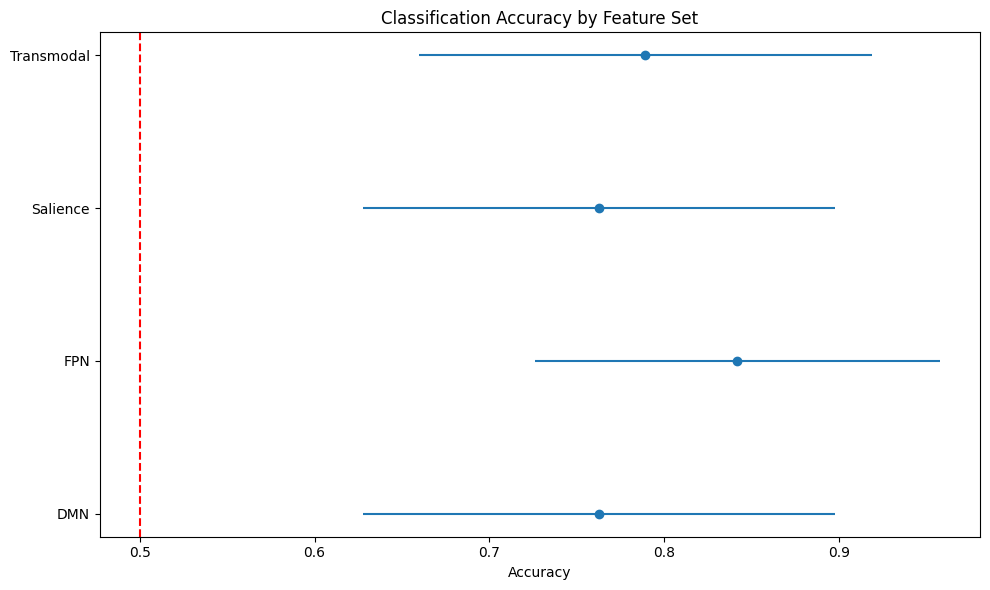

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create accuracy comparison plot
models = ['DMN', 'FPN', 'Salience', 'Transmodal']
accuracies = [0.763, 0.842, 0.763, 0.789]
ci_lower = [0.628, 0.726, 0.628, 0.660]
ci_upper = [0.898, 0.958, 0.898, 0.919]

# Calculate error bars
xerr = [((acc - low), (high - acc)) for acc, low, high in zip(accuracies, ci_lower, ci_upper)]
xerr = np.array(xerr).T  # Transpose to match the required shape

plt.figure(figsize=(10, 6))
plt.errorbar(accuracies, range(len(models)), 
             xerr=xerr,
             fmt='o')
plt.yticks(range(len(models)), models)
plt.xlabel('Accuracy')
plt.title('Classification Accuracy by Feature Set')
plt.axvline(x=0.5, color='r', linestyle='--', label='Chance level')
plt.tight_layout()
plt.show()